<a href="https://colab.research.google.com/github/shwe-hg/capstone-project-on-ML-Regression-/blob/main/Project_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bike Sharing Demand Prediction**

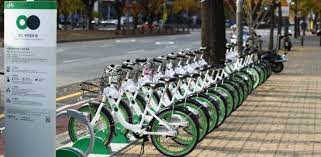

##Project Type : Regression 
##Contribution : Individual 

##Project summary :

###Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##GitHub Link :                                       
###GitHub Link -

##About the dataset :

###We have the data which contains hour , temperature, humidity etc .

###**Dataset info** :

Number of columns - 14

Number of rows - 8760

##Dataset Description :

###1.**Date** : year-month-day
###2.**Rented Bike count** - Count of bikes rented at each hour
###3.**Hour** - Hour of he day
###4.**Temperature**-Temperature in Celsius
###5.**Humidity** - %
###6.**Windspeed** - m/s
###7.**Visibility** - 10m
###8.**Dew point temperature** - Celsius
###9.**Solar radiation** - MJ/m2
###10.**Rainfall** - mm
###11.**Snowfall** - cm
###12.**Seasons** - Winter, Spring, Summer, Autumn
###13.**Holiday** - Holiday/No holiday
###14.**Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

##Importing all libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')



import datetime as dt

In [ ]:
# mounting the google drive to access the files 
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [142]:
# loading dataset 
df=pd.read_csv("/content/SeoulBikeData.csv" ,encoding='unicode_escape')

In [143]:
# first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [144]:
#last 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [145]:
# shape of dataset
df.shape

(8760, 14)

In [146]:
#info about columns 
df.columns 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [147]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [148]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [151]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

In [152]:
# statistical info
df1.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [154]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## **Preprocessing the dataset**

###Duplicate Values

In [155]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 14)


We found that there is no duplicate values in the above dataset .

###Missing values / Null values

In [156]:
df1.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [158]:
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

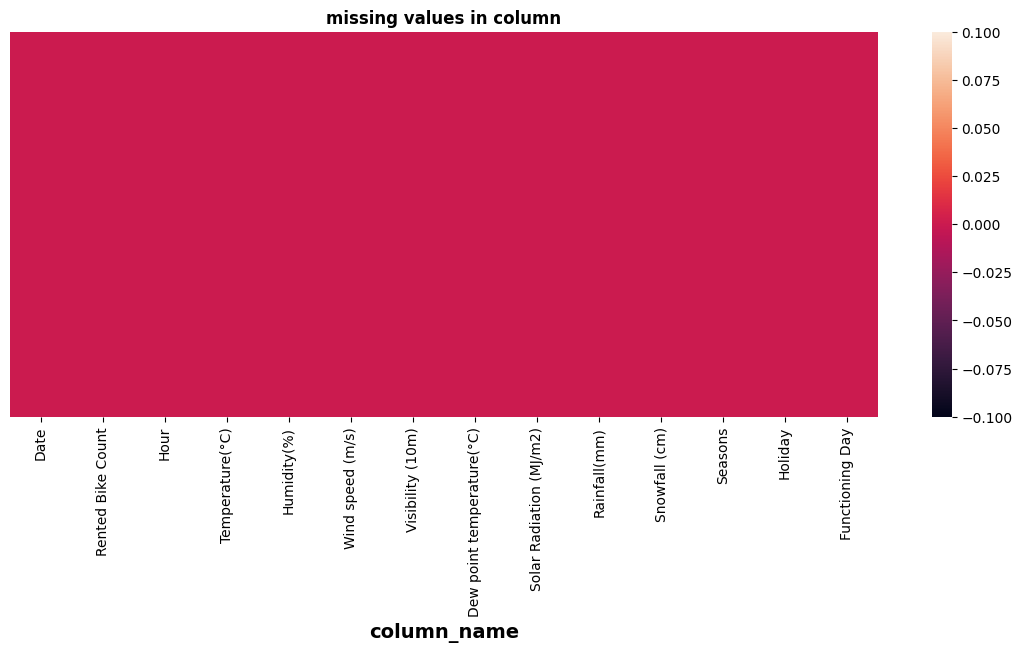

In [159]:
# heatmap for missing values .
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=12)
plt.show()


Getting the data type of dataset .

In [161]:
df1.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [162]:
df1['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

**converting date column dtype object to date.**

In [163]:
df1['Date']= pd.to_datetime(df1['Date'])

In [164]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].apply(lambda x : x.month)
df1['day_of_week'] = df1['Date'].dt.day_name()
df1['weekdays_weekend']=df1['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df1=df1.drop(columns=['Date','day_of_week'],axis=1)

**we converted the date column into 3 different column  i.e day , month , year**.


**the day column contain info of 365 days , for our relevance we converted day into weekdays and weekend . after that we dropped the column day_of_week** .

In [165]:
df1['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

Text(0.5, 1.0, 'weekdays_and_weekend')

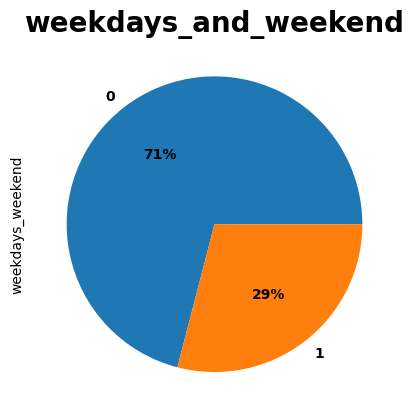

In [166]:
plt.subplot(1,1,1)
weekdays_and_weekend = df1.weekdays_weekend.value_counts()
weekdays_and_weekend.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('weekdays_and_weekend',fontweight="bold", size=20)

**The % of weekends is 29% where as weekdays is 71%.**

<Axes: >

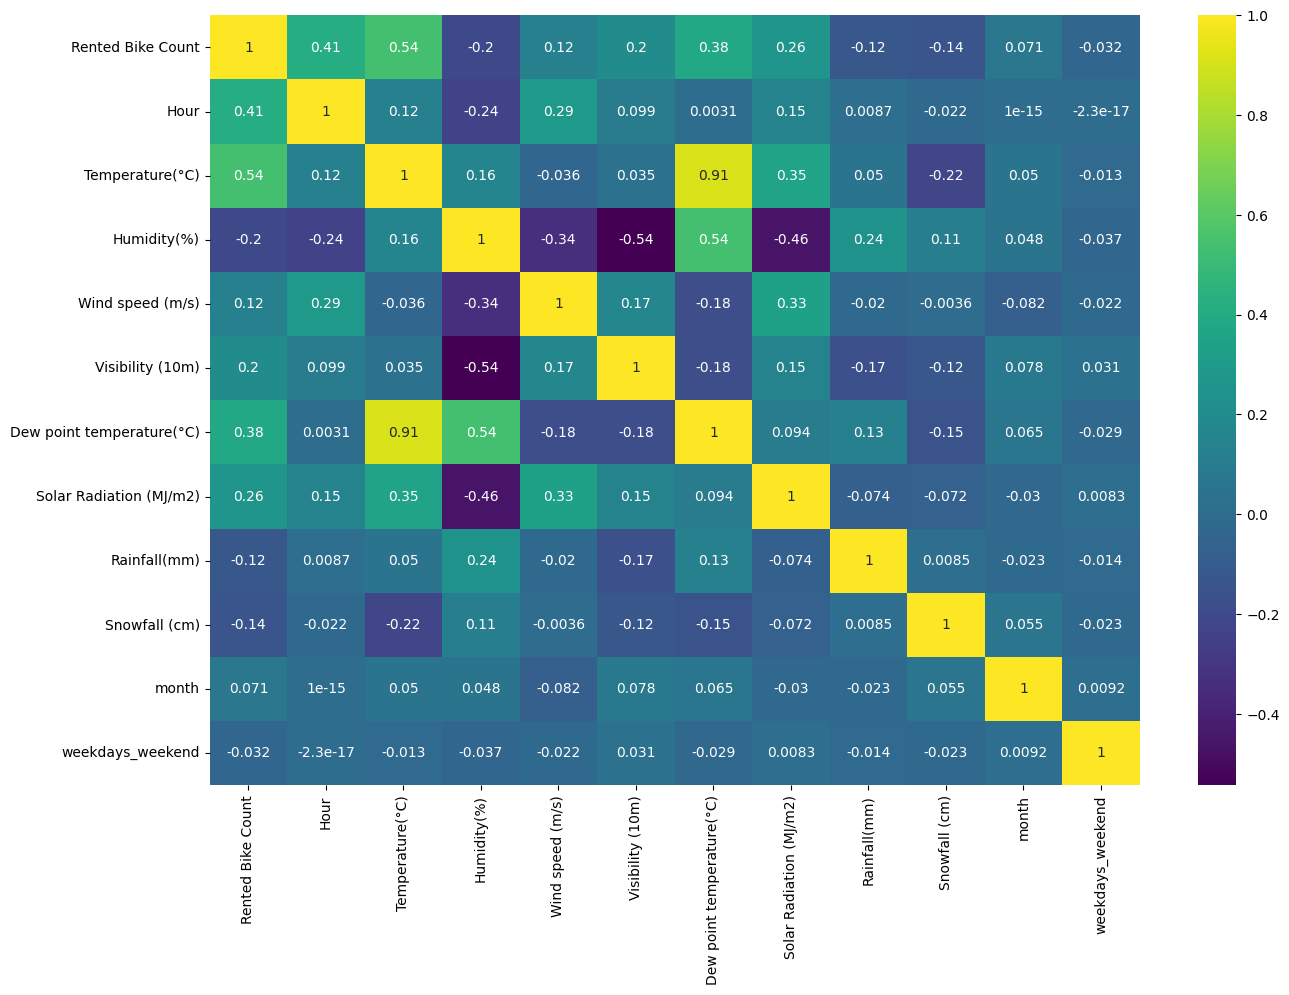

In [167]:
#checking correlation with the help of heatmap
corr_mat=df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,cmap='viridis',annot=True)

In [89]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning Day            8760 non-null   category
 13  month                      8760 n

In [91]:
df1.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

**converting Hour, month , weekends_weekday columns from integer to Categorical.**

In [92]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df1[col]=df1[col].astype('category')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning Day            8760 non-null   category
 13  month                      8760 n

In [94]:
#Change the int64 column into catagory column
cols=['Holiday','Functioning Day','Seasons']
for col in cols:
  df1[col]=df1[col].astype('category')

In [95]:
df1['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Text(0.5, 1.0, 'different seasons are')

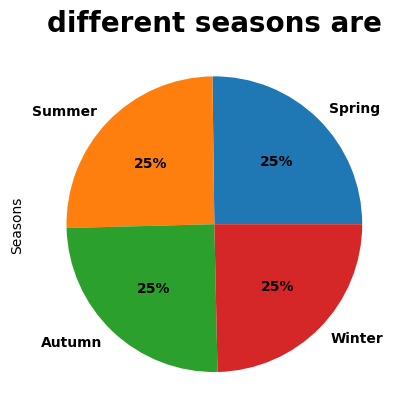

In [96]:
plt.subplot(1,1,1)
seasons = df1.Seasons.value_counts()
seasons.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('different seasons are',fontweight="bold", size=20)

**All seasons are distributed equally i.e 25% of summer, spring, autumn, winter.**

In [97]:
df1['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'functioning days are')

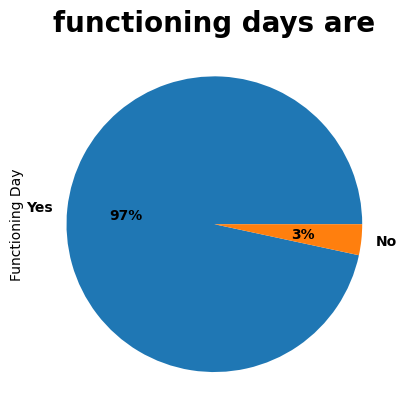

In [98]:
plt.subplot(1,1,1)
functioning_day = df1['Functioning Day'].value_counts()
functioning_day.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('functioning days are',fontweight="bold", size=20)

**The functioning day % is 97% where as non functioning day % is 3%.**

In [99]:
df1['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'holiday and non holiday are')

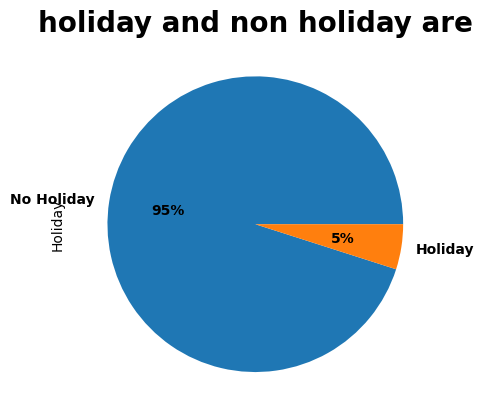

In [100]:
plt.subplot(1,1,1)
holiday = df1.Holiday.value_counts()
holiday.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('holiday and non holiday are',fontweight="bold", size=20)

**The hoilday % is 5% and the remaining is considered as no holiday.**

**Doing EDA on Categorcal data**.

In [101]:
category_columns=list(df1.select_dtypes(['category']).columns)
category_features=pd.Index(category_columns)
category_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

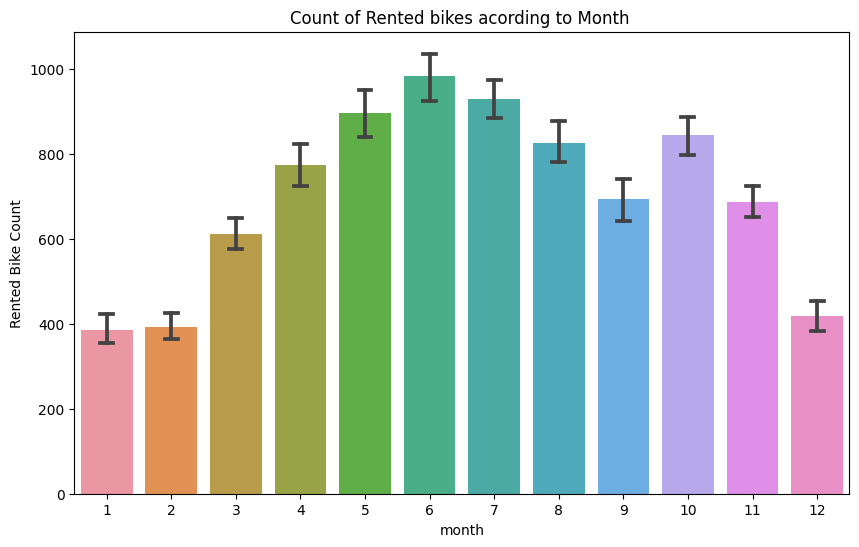

In [102]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to weekdays and weekend ')]

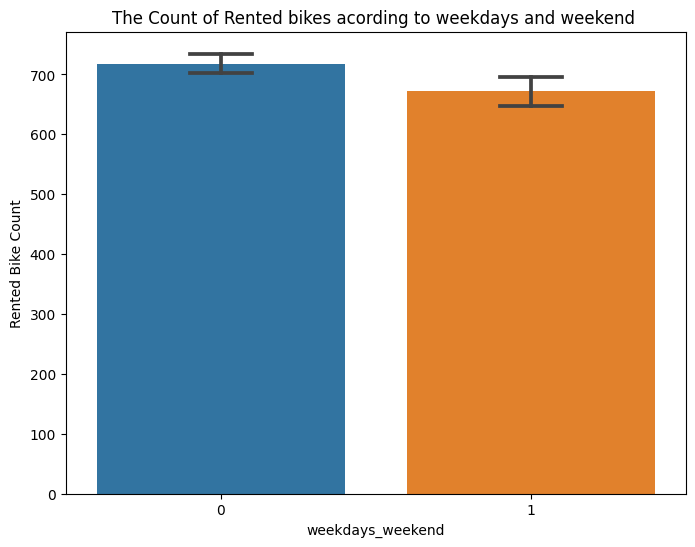

In [103]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df1,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, ' The Count of Rented bikes acording to hour in weekdays and weekend')]

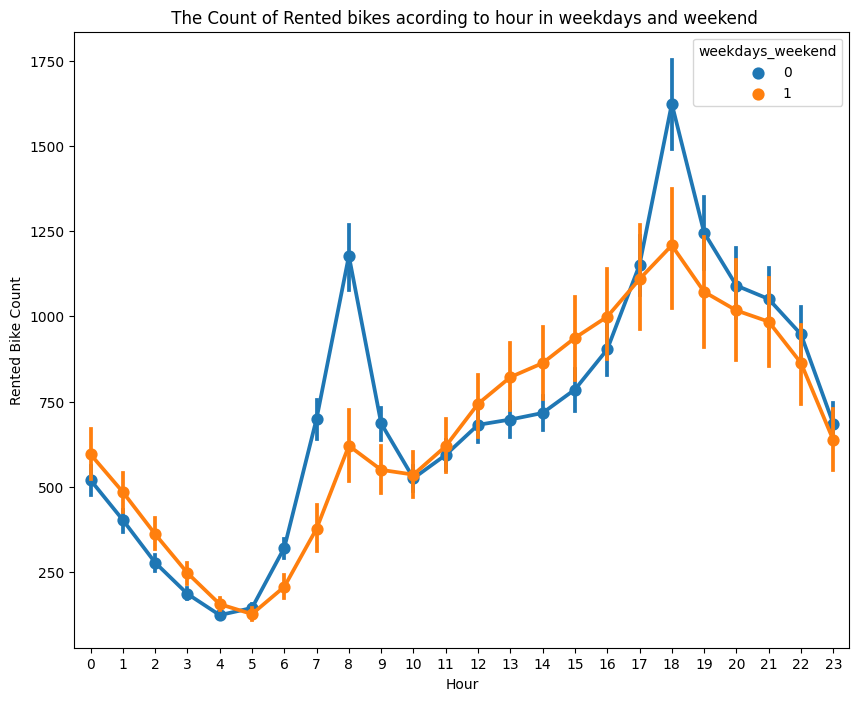

In [104]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title=' The Count of Rented bikes acording to hour in weekdays and weekend')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

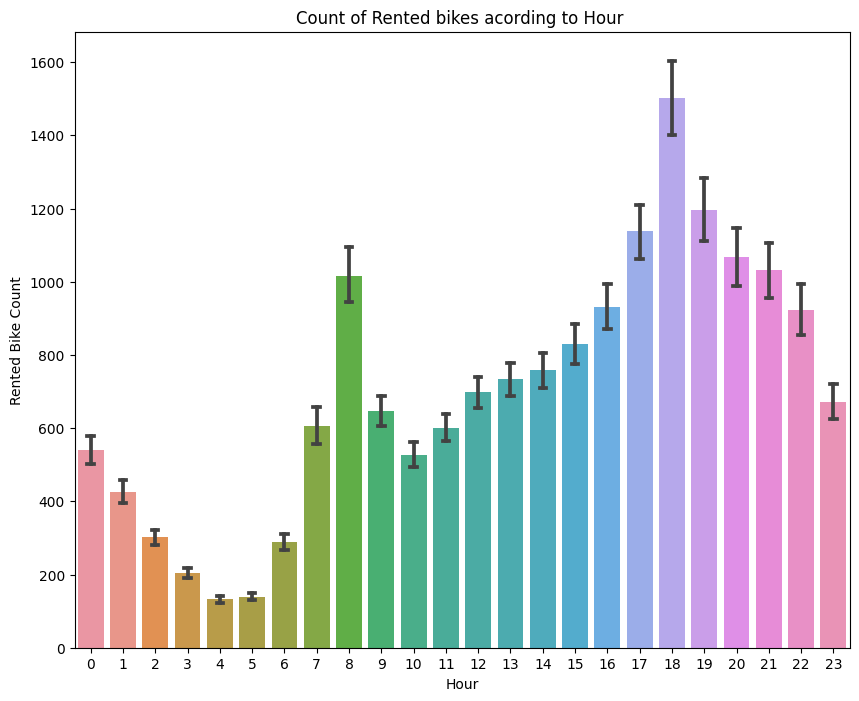

In [105]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df1,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to Functioning Day ')]

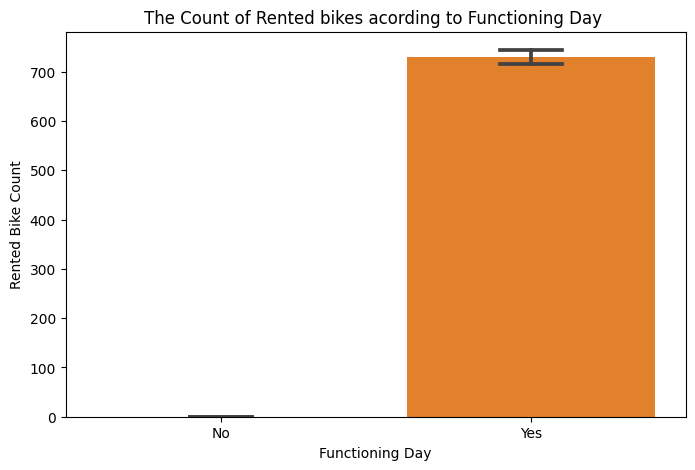

In [106]:
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=df1,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Functioning Day ')]

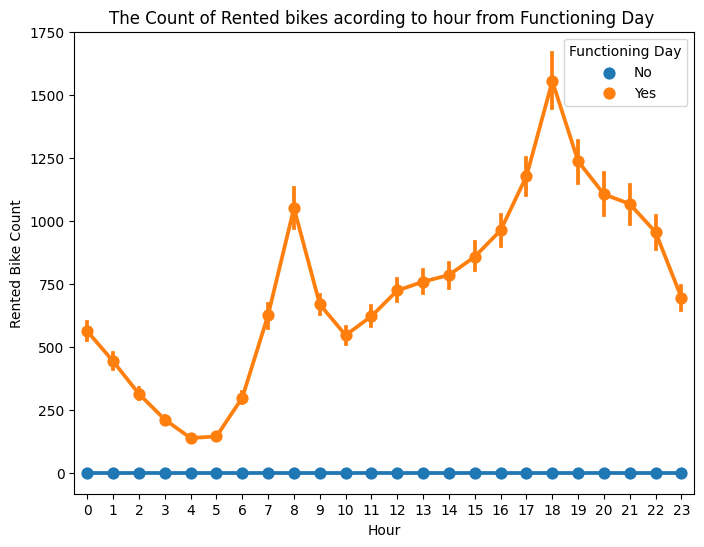

In [43]:
fig,ax=plt.subplots(figsize=(8,6))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Functioning Day ')

[Text(0.5, 1.0, 'Ths Count of Rented bikes acording to Holiday ')]

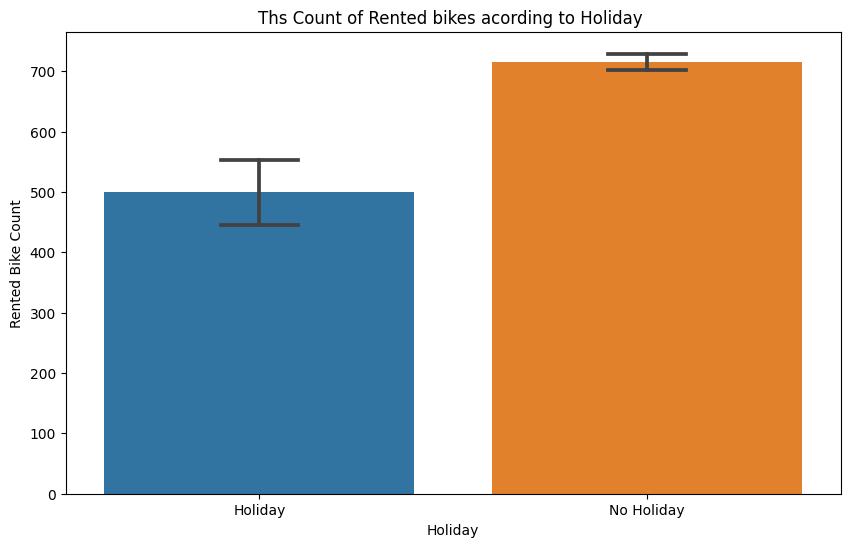

In [44]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Ths Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Holiday ')]

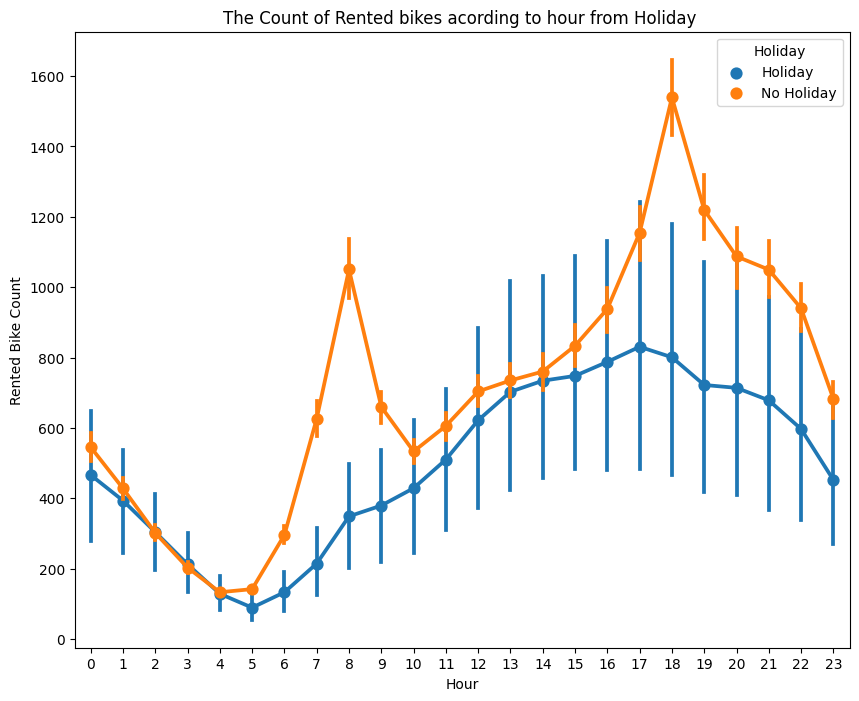

In [45]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Holiday ')

Text(0.5, 1.0, 'holiday and non holiday are')

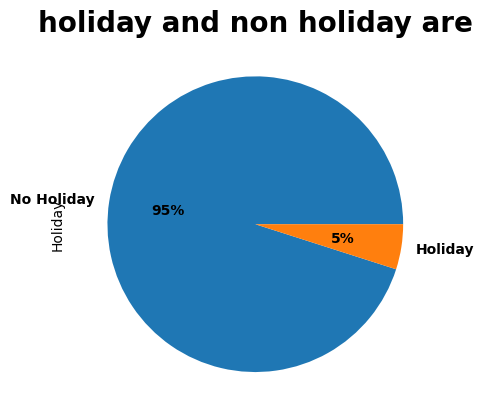

In [46]:
plt.subplot(1,1,1)
holiday = df1.Holiday.value_counts()
holiday.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('holiday and non holiday are',fontweight="bold", size=20)

[Text(0.5, 1.0, 'The Count of Rented bikes acording to Seasons ')]

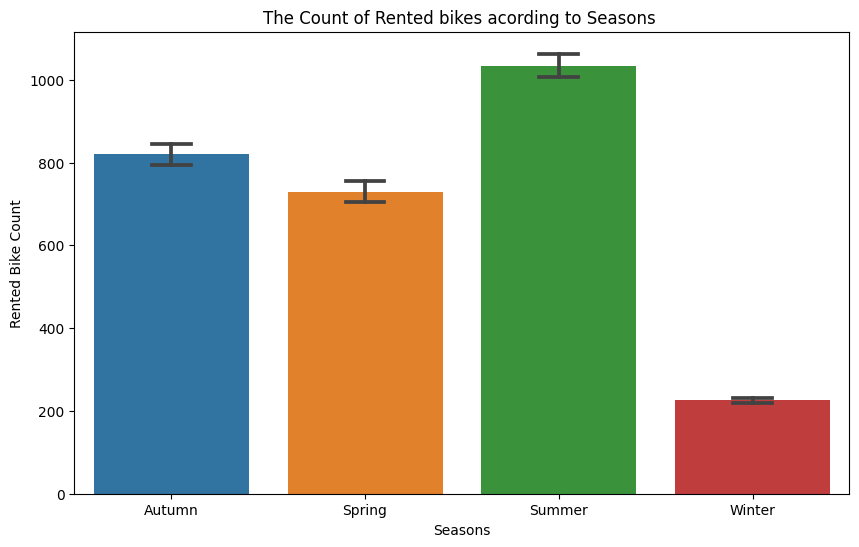

In [47]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, ' The Count of Rented bikes acording to hour to seasons ')]

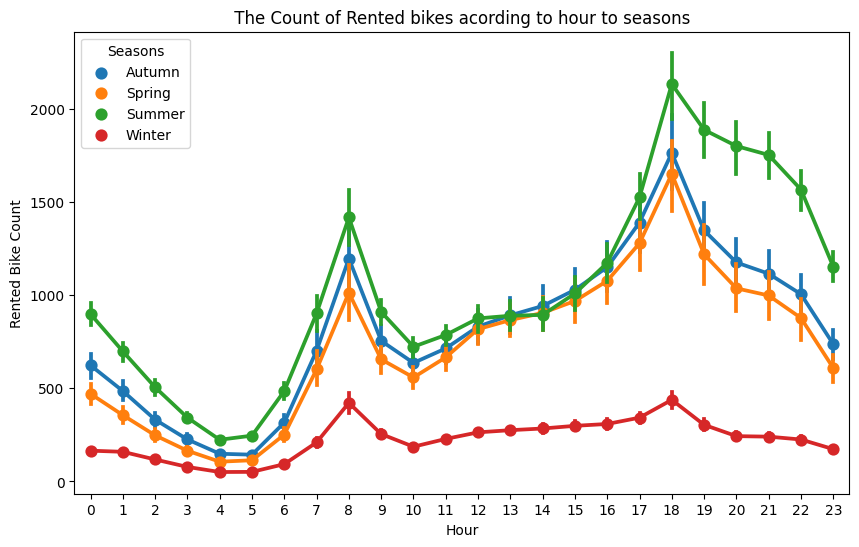

In [48]:
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title=' The Count of Rented bikes acording to hour to seasons ')

In [49]:
numerical_columns=list(df1.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

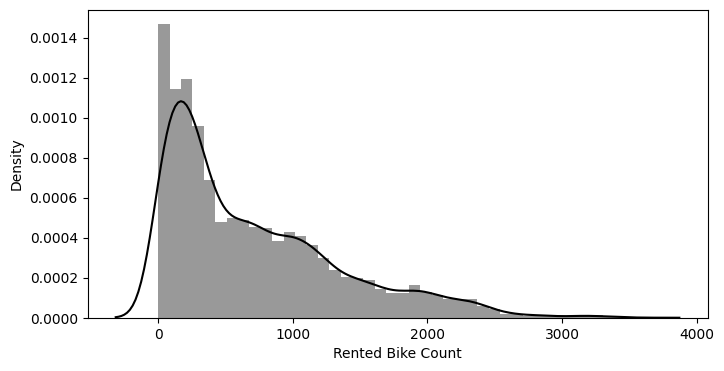

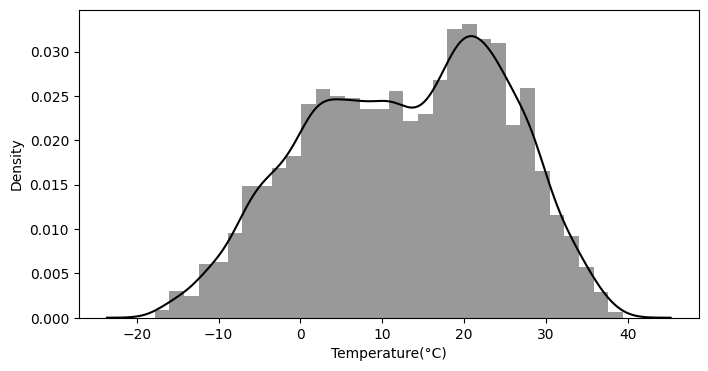

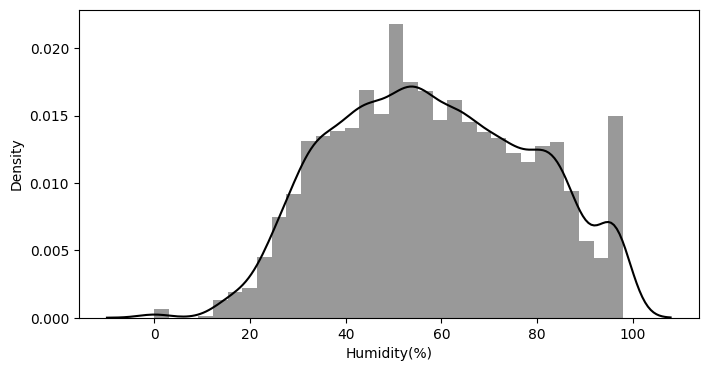

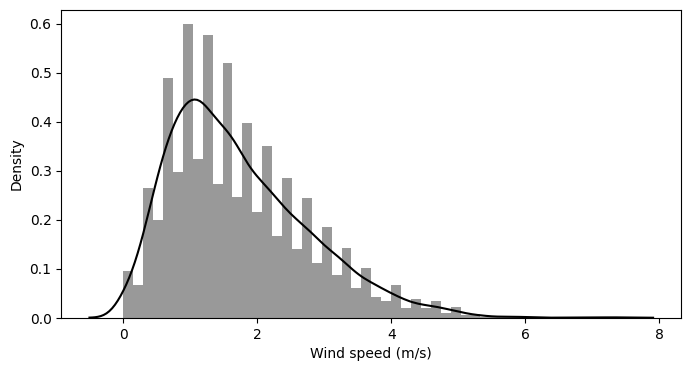

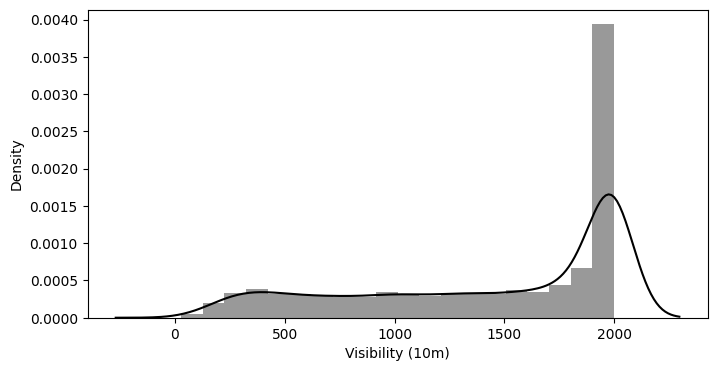

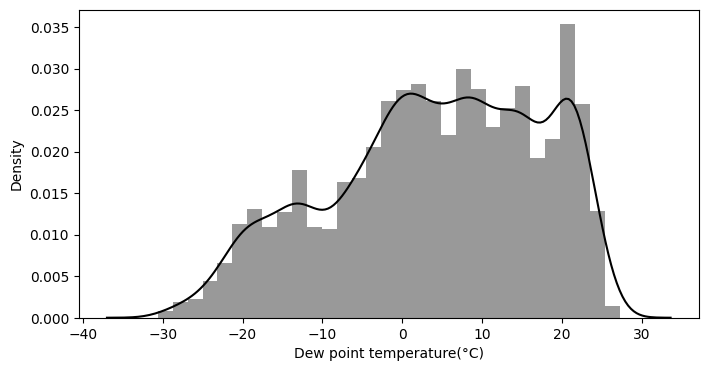

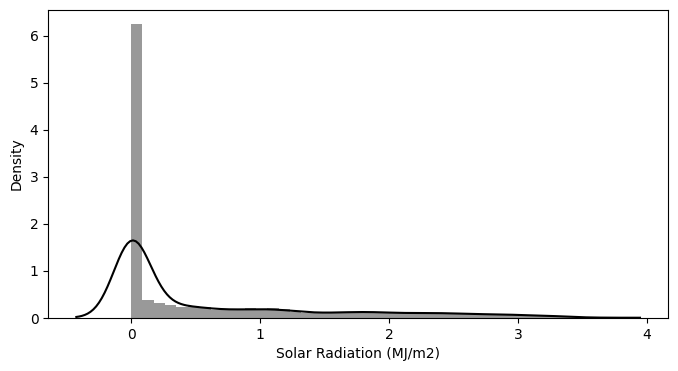

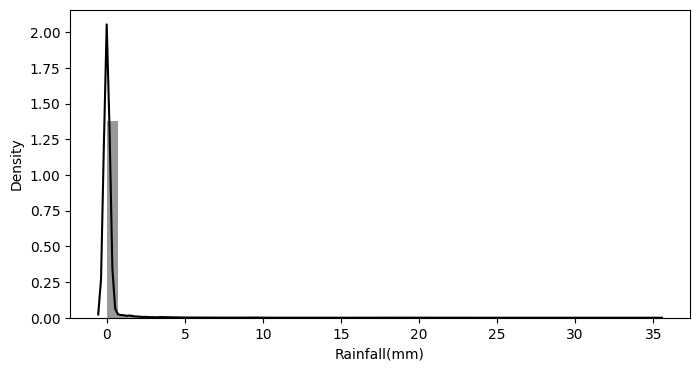

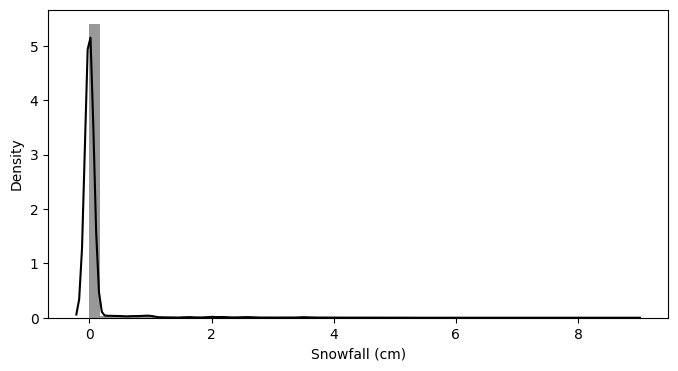

In [50]:
for col in numerical_features:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df1[col],color="black")
  plt.xlabel(col)
plt.show()

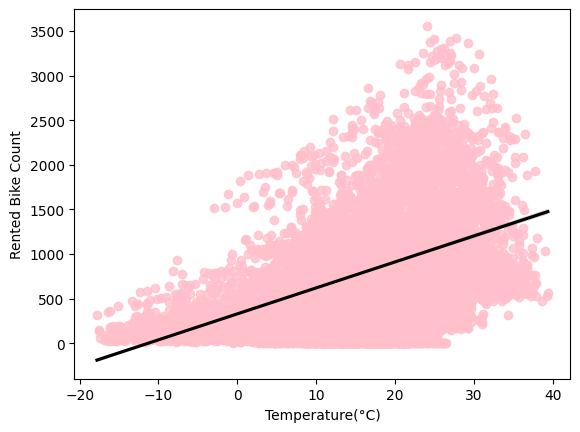

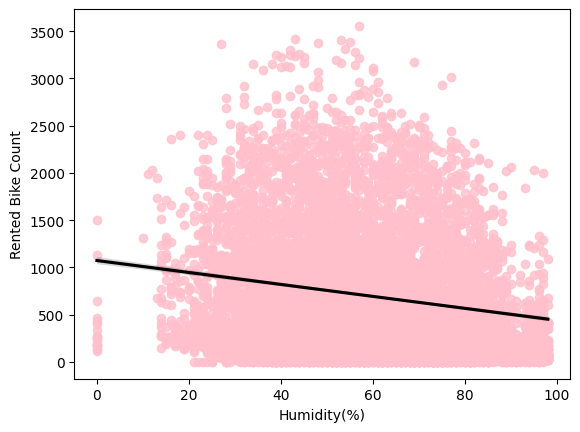

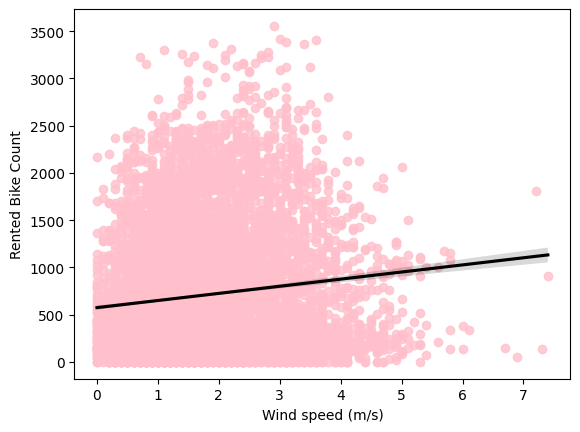

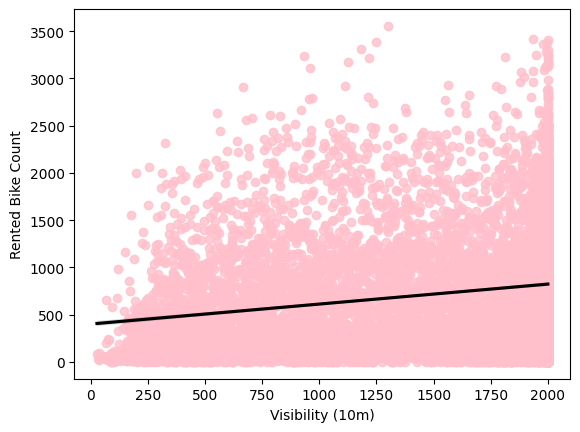

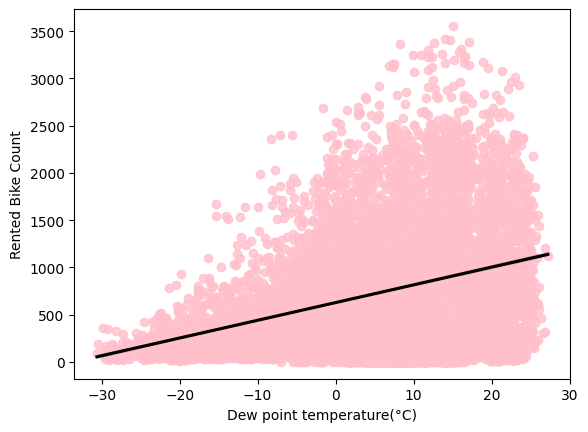

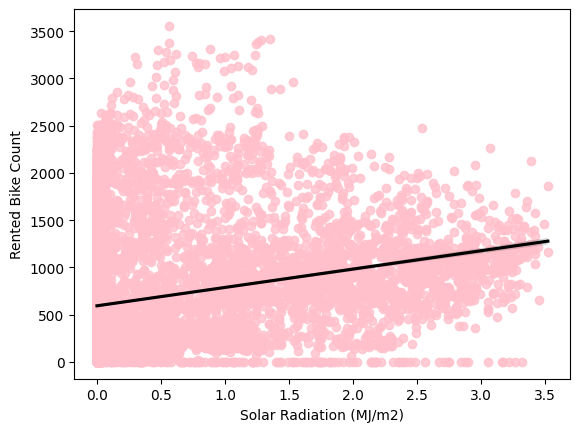

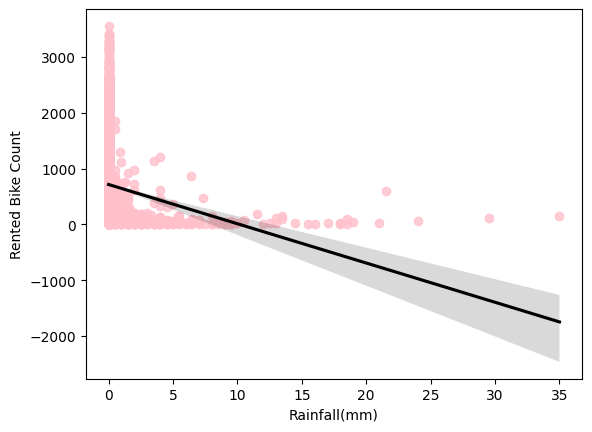

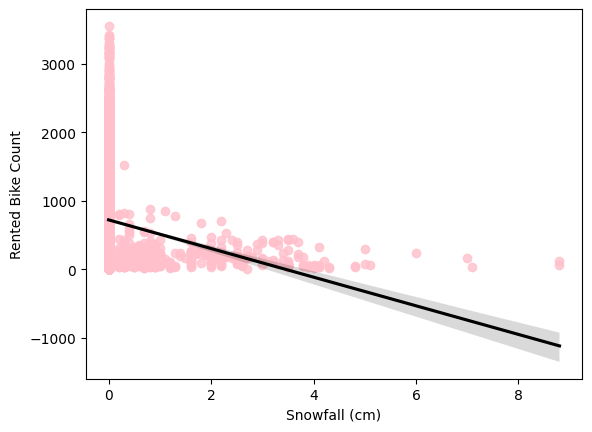

In [51]:
for col in  numerical_columns [:9]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],scatter_kws={'color':'pink'},y=df1["Rented Bike Count"],line_kws={"color": "black"})
  
  plt.show()

In [54]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) 
   for i in range(X.shape[1])]
 
   return(vif)

In [57]:
calc_vif(df1[[i for i in df.describe().columns 
      if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579
